# Лабораторная работа №2

In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

# Генерация выборок

## Распределение Пуассона

In [2]:
poisson_sample =  np.random.poisson(size = 1000)

<Axes: ylabel='Count'>

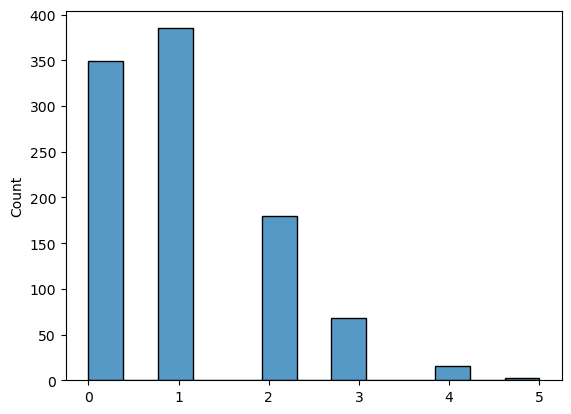

In [3]:
sns.histplot(poisson_sample)

## Нормальное распределение

In [4]:
normal_sample = np.random.normal(loc = 0, scale = 1, size = 1000)

<Axes: ylabel='Count'>

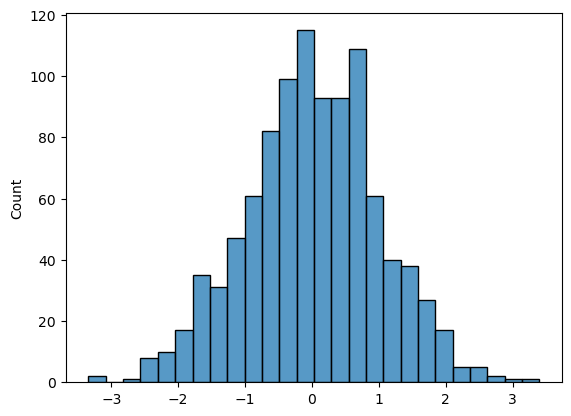

In [5]:
sns.histplot(normal_sample)

# Рассчет основных описательных статистик

## Распределение Пуассона

In [6]:
q1 = np.percentile(poisson_sample, 25)
q2 = np.percentile(poisson_sample, 50)
q3 = np.percentile(poisson_sample, 75)

print(f"Квартили: Q1 = {q1:.2f}, Q2 (медиана) = {q2:.2f}, Q3 = {q3:.2f}")

Квартили: Q1 = 0.00, Q2 (медиана) = 1.00, Q3 = 2.00


In [7]:
mean = np.mean(poisson_sample)
median = np.median(poisson_sample)
mode = st.mode(poisson_sample, keepdims = True)[0][0]  

print(f"Меры центральной тенденции: Среднее = {mean:.2f}, Медиана = {median:.2f}, Мода = {mode:.2f}")

Меры центральной тенденции: Среднее = 1.02, Медиана = 1.00, Мода = 1.00


In [8]:
range_val = np.max(poisson_sample) - np.min(poisson_sample)
iqr = q3 - q1
variance = np.var(poisson_sample)  
std_dev = np.std(poisson_sample)    
cv = (std_dev / np.mean(poisson_sample)) * 100 if np.mean(poisson_sample) != 0 else np.nan
mad = np.mean(np.abs(poisson_sample - np.mean(poisson_sample)))

print(f"Меры вариабельности: Размах = {range_val:.2f}, Интерквартильный размах = {iqr:.2f}, Дисперсия = {variance:.2f}, ")
print(f"Стандартное отклонение = {std_dev:.2f}, Коэффициент вариации = {cv:.2f}%, Среднее абсолютное отклонение = {mad:.2f}")

Меры вариабельности: Размах = 5.00, Интерквартильный размах = 2.00, Дисперсия = 0.98, 
Стандартное отклонение = 0.99, Коэффициент вариации = 96.59%, Среднее абсолютное отклонение = 0.73


In [9]:
skewness = st.skew(poisson_sample)
kurtosis = st.kurtosis(poisson_sample)
print(f"Меры формы распределения: Коэффициент асимметрии={skewness:.2f}, Коэффициент эксцесса={kurtosis:.2f}")

Меры формы распределения: Коэффициент асимметрии=0.90, Коэффициент эксцесса=0.51


In [10]:
raw_moments = [np.mean(poisson_sample**i) for i in range(1, 6)]
print(f"Первые 5 начальных моментов: M1={raw_moments[0]:.2f}, M2={raw_moments[1]:.2f}, M3={raw_moments[2]:.2f}, M4={raw_moments[3]:.2f}, M5={raw_moments[4]:.2f}")

Первые 5 начальных моментов: M1=1.02, M2=2.02, M3=4.93, M4=14.12, M5=45.30


In [11]:
central_moments = [np.mean((poisson_sample - np.mean(poisson_sample))**i) for i in range(1, 6)]
print(f"Первые 5 центральных моментов: μ1={central_moments[0]:.2f}, μ2={central_moments[1]:.2f}, μ3={central_moments[2]:.2f}, μ4={central_moments[3]:.2f}, μ5={central_moments[4]:.2f}")

Первые 5 центральных моментов: μ1=0.00, μ2=0.98, μ3=0.87, μ4=3.34, μ5=7.55


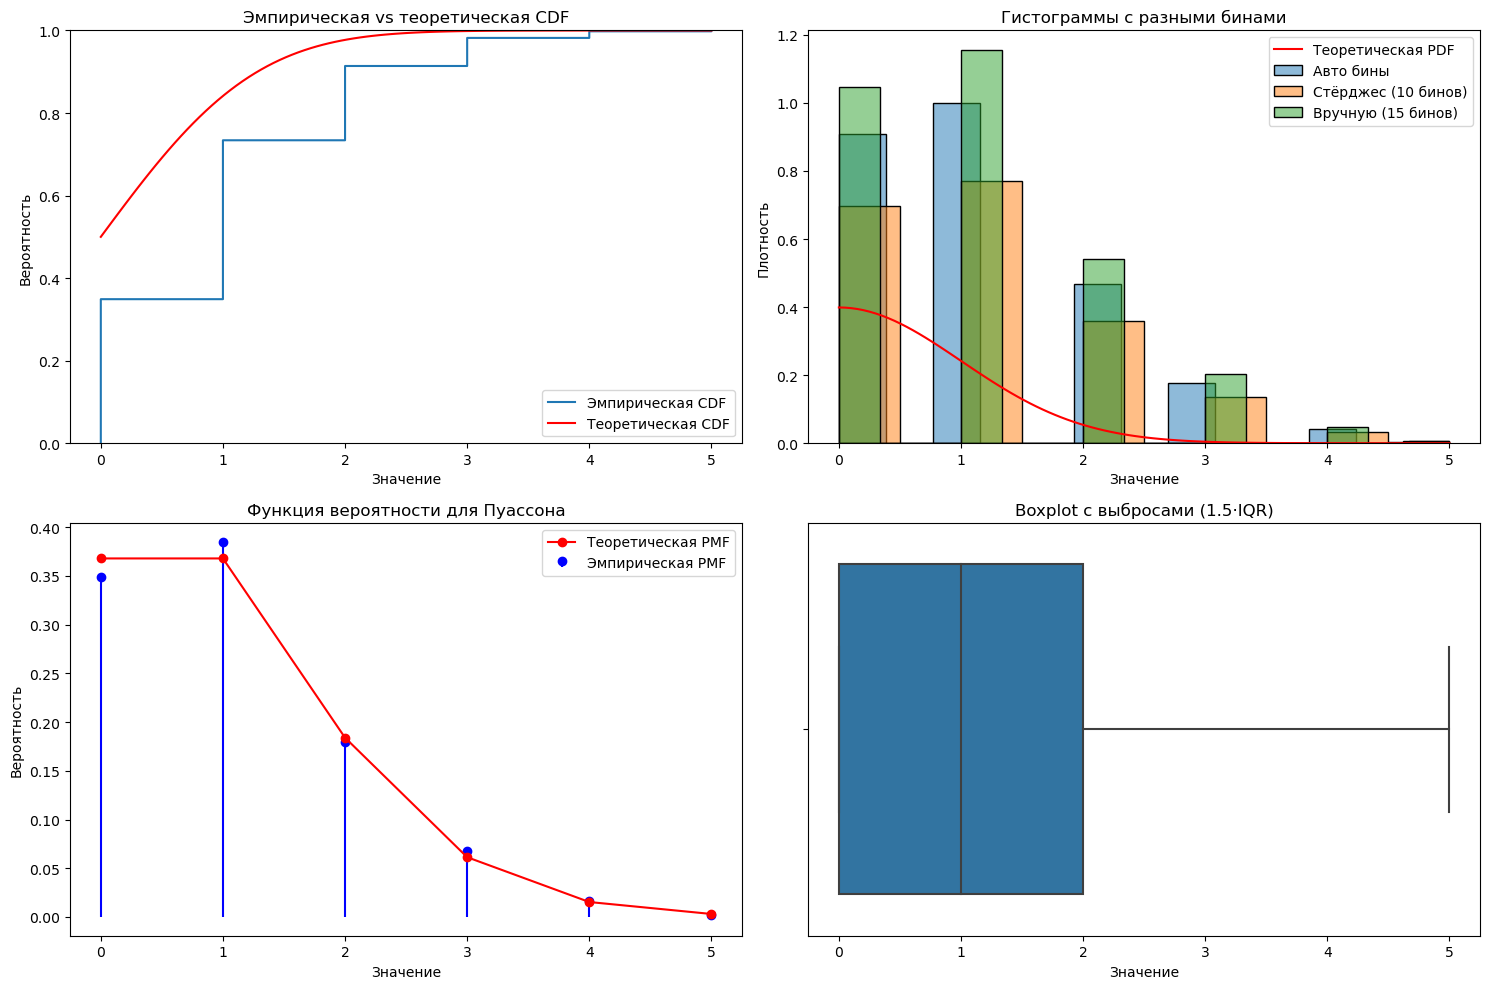

In [12]:
plt.figure(figsize=(15, 10))

# Эмпирическая и теоретическая CDF
plt.subplot(2, 2, 1)
sns.ecdfplot(poisson_sample, label = 'Эмпирическая CDF')
x = np.linspace(np.min(poisson_sample), np.max(poisson_sample), 100)
plt.plot(x, st.norm.cdf(x, loc = 0, scale = 1), 'r-', label = 'Теоретическая CDF')
plt.title('Эмпирическая vs теоретическая CDF')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.legend()

# Гистограммы с разными бинами
plt.subplot(2, 2, 2)

# Автоматический выбор бинов
sns.histplot(poisson_sample, kde = False, stat = 'density', label = 'Авто бины', alpha = 0.5)

# По формуле Стёрджеса
bins_sturges = int(1 + 3.322 * np.log10(len(poisson_sample)))
sns.histplot(poisson_sample, bins = bins_sturges, kde = False, stat = 'density', 
             label = f'Стёрджес ({bins_sturges} бинов)', alpha = 0.5)
# Вручную выбранные бины
sns.histplot(poisson_sample, bins=15, kde=False, stat='density', 
             label = 'Вручную (15 бинов)', alpha = 0.5)
plt.plot(x, st.norm.pdf(x, loc = 0, scale = 1), 'r-', label='Теоретическая PDF')
plt.title('Гистограммы с разными бинами')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# 2. Для дискретного распределения (Пуассона)
plt.subplot(2, 2, 3)
# Эмпирическая функция вероятности
unique, counts = np.unique(poisson_sample, return_counts = True)
probs = counts / len(poisson_sample)
plt.stem(unique, probs, linefmt='b-', markerfmt='bo', basefmt=' ', 
         label='Эмпирическая PMF')

# Теоретическая функция вероятности
k = np.arange(0, np.max(poisson_sample) + 1)
plt.plot(k, st.poisson.pmf(k, mu = 1), 'ro-', label='Теоретическая PMF')
plt.title('Функция вероятности для Пуассона')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.legend()

# 3. Boxplot с выбросами
plt.subplot(2, 2, 4)
sns.boxplot(x = poisson_sample, whis = 1.5)
plt.title('Boxplot с выбросами (1.5·IQR)')
plt.xlabel('Значение')

plt.tight_layout()
plt.show()

## Нормальное распределение

In [13]:
q1 = np.percentile(normal_sample, 25)
q2 = np.percentile(normal_sample, 50)
q3 = np.percentile(normal_sample, 75)

print(f"Квартили: Q1 = {q1:.2f}, Q2 (медиана) = {q2:.2f}, Q3 = {q3:.2f}")

Квартили: Q1 = -0.64, Q2 (медиана) = 0.02, Q3 = 0.67


In [14]:
mean = np.mean(normal_sample)
median = np.median(normal_sample)
mode = st.mode(normal_sample, keepdims = True)[0][0]  

print(f"Меры центральной тенденции: Среднее = {mean:.2f}, Медиана = {median:.2f}, Мода = {mode:.2f}")

Меры центральной тенденции: Среднее = 0.01, Медиана = 0.02, Мода = -3.34


In [15]:
range_val = np.max(normal_sample) - np.min(normal_sample)
iqr = q3 - q1
variance = np.var(normal_sample)  
std_dev = np.std(normal_sample)    
cv = (std_dev / np.mean(normal_sample)) * 100 if np.mean(normal_sample) != 0 else np.nan
mad = np.mean(np.abs(normal_sample - np.mean(normal_sample)))

print(f"Меры вариабельности: Размах = {range_val:.2f}, Интерквартильный размах = {iqr:.2f}, Дисперсия = {variance:.2f}, ")
print(f"Стандартное отклонение = {std_dev:.2f}, Коэффициент вариации = {cv:.2f}%, Среднее абсолютное отклонение = {mad:.2f}")

Меры вариабельности: Размах = 6.74, Интерквартильный размах = 1.31, Дисперсия = 0.99, 
Стандартное отклонение = 0.99, Коэффициент вариации = 9006.67%, Среднее абсолютное отклонение = 0.79


In [16]:
skewness = st.skew(normal_sample)
kurtosis = st.kurtosis(normal_sample)
print(f"Меры формы распределения: Коэффициент асимметрии={skewness:.2f}, Коэффициент эксцесса={kurtosis:.2f}")

Меры формы распределения: Коэффициент асимметрии=-0.07, Коэффициент эксцесса=0.06


In [17]:
raw_moments = [np.mean(normal_sample**i) for i in range(1, 6)]
print(f"Первые 5 начальных моментов: M1={raw_moments[0]:.2f}, M2={raw_moments[1]:.2f}, M3={raw_moments[2]:.2f}, M4={raw_moments[3]:.2f}, M5={raw_moments[4]:.2f}")

Первые 5 начальных моментов: M1=0.01, M2=0.99, M3=-0.04, M4=2.99, M5=-0.23


In [18]:
central_moments = [np.mean((normal_sample - np.mean(normal_sample))**i) for i in range(1, 6)]
print(f"Первые 5 центральных моментов: μ1={central_moments[0]:.2f}, μ2={central_moments[1]:.2f}, μ3={central_moments[2]:.2f}, μ4={central_moments[3]:.2f}, μ5={central_moments[4]:.2f}")

Первые 5 центральных моментов: μ1=0.00, μ2=0.99, μ3=-0.07, μ4=2.99, μ5=-0.40


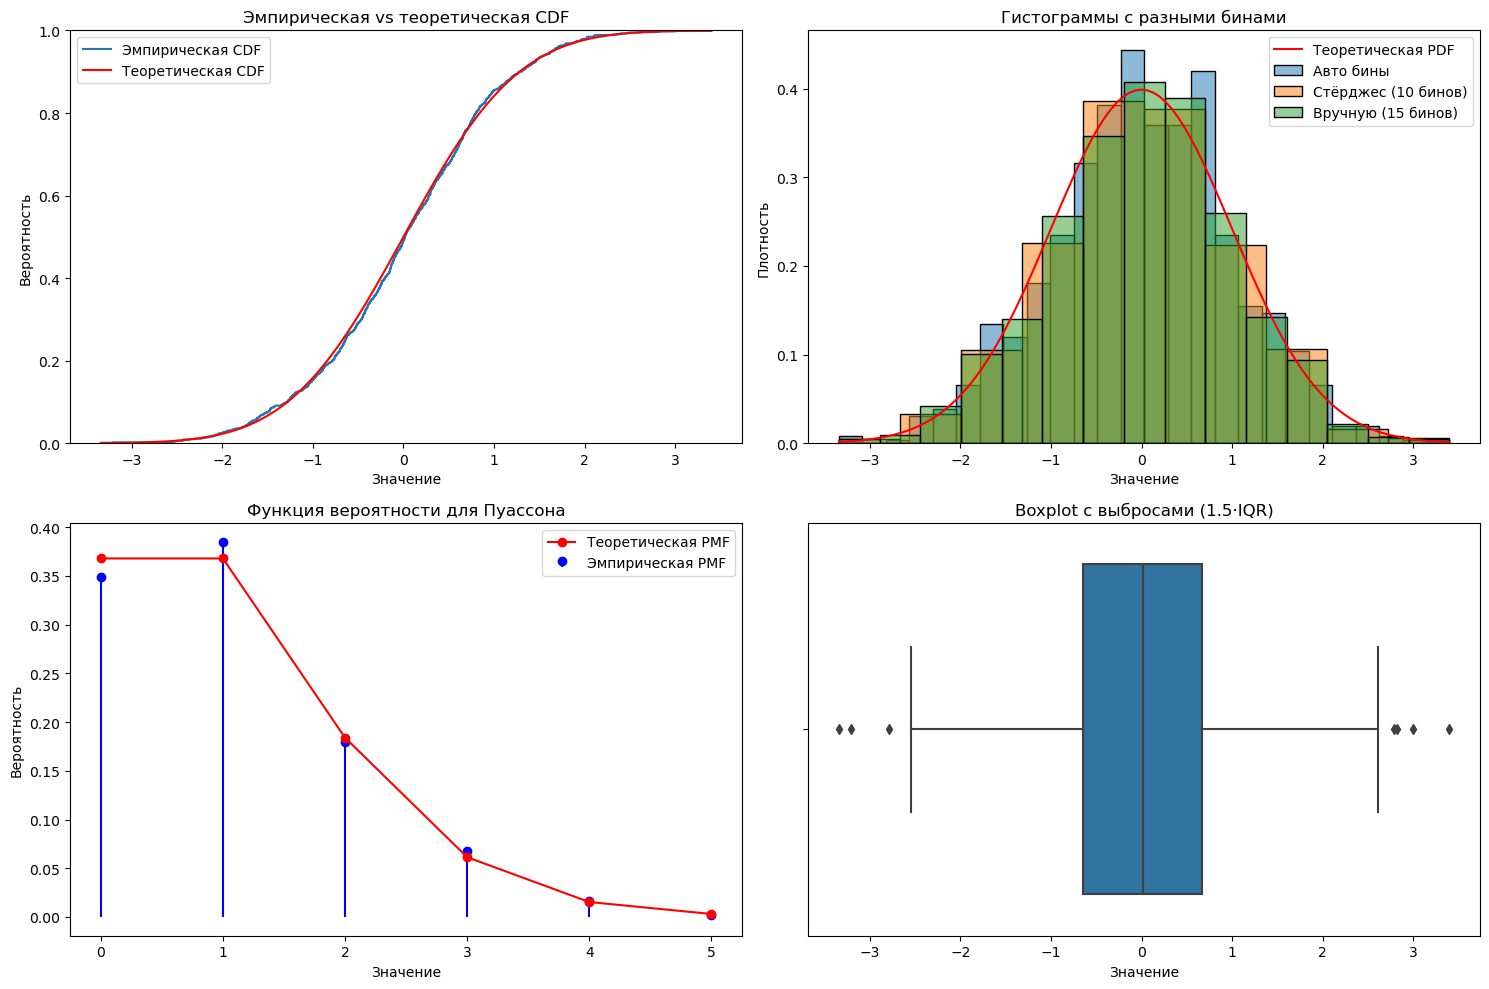

In [19]:
plt.figure(figsize=(15, 10))

# Эмпирическая и теоретическая CDF
plt.subplot(2, 2, 1)
sns.ecdfplot(normal_sample, label = 'Эмпирическая CDF')
x = np.linspace(np.min(normal_sample), np.max(normal_sample), 100)
plt.plot(x, st.norm.cdf(x, loc = 0, scale = 1), 'r-', label = 'Теоретическая CDF')
plt.title('Эмпирическая vs теоретическая CDF')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.legend()

# Гистограммы с разными бинами
plt.subplot(2, 2, 2)
# Автоматический выбор бинов
sns.histplot(normal_sample, kde = False, stat = 'density', label = 'Авто бины', alpha = 0.5)
# По формуле Стёрджеса
bins_sturges = int(1 + 3.322 * np.log10(len(normal_sample)))
sns.histplot(normal_sample, bins = bins_sturges, kde = False, stat='density', 
             label = f'Стёрджес ({bins_sturges} бинов)', alpha = 0.5)
# Вручную выбранные бины
sns.histplot(normal_sample, bins = 15, kde = False, stat = 'density', 
             label = 'Вручную (15 бинов)', alpha = 0.5)
plt.plot(x, st.norm.pdf(x, loc = 0, scale = 1), 'r-', label = 'Теоретическая PDF')
plt.title('Гистограммы с разными бинами')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# 2. Для дискретного распределения (Пуассона)
plt.subplot(2, 2, 3)
# Эмпирическая функция вероятности
unique, counts = np.unique(poisson_sample, return_counts = True)
probs = counts / len(poisson_sample)
plt.stem(unique, probs, linefmt = 'b-', markerfmt = 'bo', basefmt = ' ', 
         label = 'Эмпирическая PMF')

# Теоретическая функция вероятности
k = np.arange(0, np.max(poisson_sample) + 1)
plt.plot(k, st.poisson.pmf(k, mu = 1), 'ro-', label = 'Теоретическая PMF')
plt.title('Функция вероятности для Пуассона')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.legend()

# 3. Boxplot с выбросами
plt.subplot(2, 2, 4)
sns.boxplot(x = normal_sample, whis = 1.5)
plt.title('Boxplot с выбросами (1.5·IQR)')
plt.xlabel('Значение')

plt.tight_layout()
plt.show()

In [20]:
#  Устойчивость характеристик

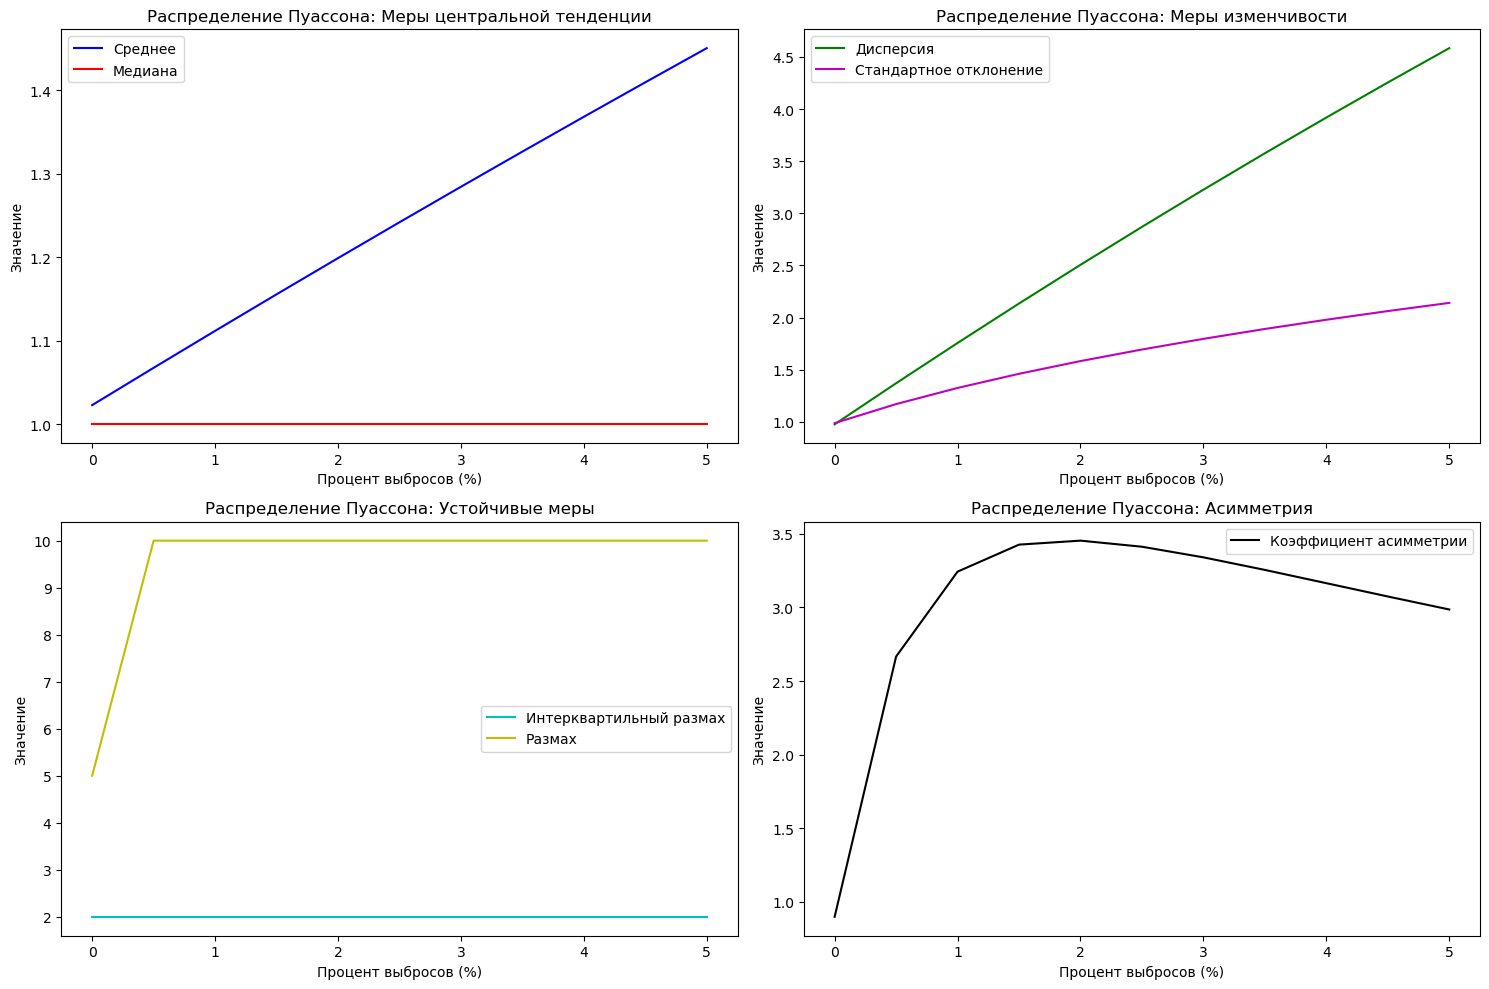

In [21]:
outlier_percentages = np.linspace(0, 5, 11)

poisson_means = []
poisson_medians = []
poisson_vars = []
poisson_stds = []
poisson_iqrs = []
poisson_ranges = []
poisson_skews = []

for p in outlier_percentages:
    n_outliers = int(1000 * p / 100)
    sample_with_outliers = np.concatenate([poisson_sample, np.full(n_outliers, 10)])
    
    poisson_means.append(np.mean(sample_with_outliers))
    poisson_medians.append(np.median(sample_with_outliers))
    poisson_vars.append(np.var(sample_with_outliers))
    poisson_stds.append(np.std(sample_with_outliers))
    poisson_iqrs.append(st.iqr(sample_with_outliers))
    poisson_ranges.append(np.max(sample_with_outliers) - np.min(sample_with_outliers))
    poisson_skews.append(st.skew(sample_with_outliers))

plt.figure(figsize=(15, 10))

# Меры центральной тенденции
plt.subplot(2, 2, 1)
plt.plot(outlier_percentages, poisson_means, 'b-', label='Среднее')
plt.plot(outlier_percentages, poisson_medians, 'r-', label='Медиана')
plt.title('Распределение Пуассона: Меры центральной тенденции')
plt.xlabel('Процент выбросов (%)')
plt.ylabel('Значение')
plt.legend()

# Меры вариабельности
plt.subplot(2, 2, 2)
plt.plot(outlier_percentages, poisson_vars, 'g-', label='Дисперсия')
plt.plot(outlier_percentages, poisson_stds, 'm-', label='Стандартное отклонение')
plt.title('Распределение Пуассона: Меры изменчивости')
plt.xlabel('Процент выбросов (%)')
plt.ylabel('Значение')
plt.legend()

# Устойчивые меры
plt.subplot(2, 2, 3)
plt.plot(outlier_percentages, poisson_iqrs, 'c-', label='Интерквартильный размах')
plt.plot(outlier_percentages, poisson_ranges, 'y-', label='Размах')
plt.title('Распределение Пуассона: Устойчивые меры')
plt.xlabel('Процент выбросов (%)')
plt.ylabel('Значение')
plt.legend()

# Асимметрия
plt.subplot(2, 2, 4)
plt.plot(outlier_percentages, poisson_skews, 'k-', label='Коэффициент асимметрии')
plt.title('Распределение Пуассона: Асимметрия')
plt.xlabel('Процент выбросов (%)')
plt.ylabel('Значение')
plt.legend()

plt.tight_layout()
plt.show()

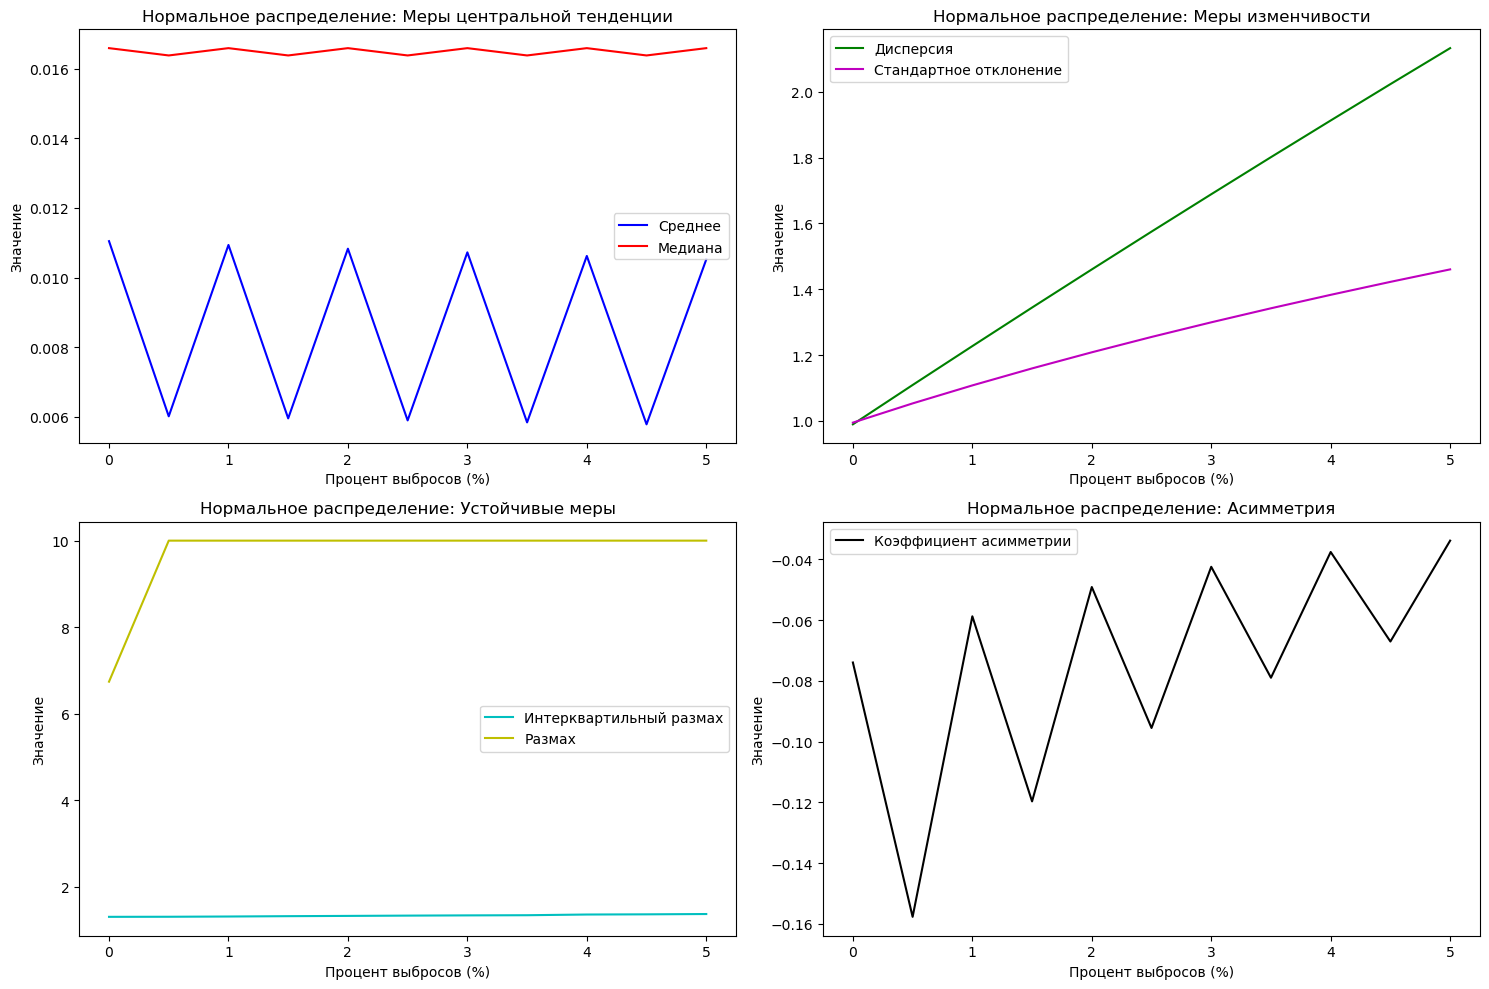

In [24]:
normal_means = []
normal_medians = []
normal_vars = []
normal_stds = []
normal_iqrs = []
normal_ranges = []
normal_skews = []

for p in outlier_percentages:
    n_outliers = int(1000 * p / 100)
    half = n_outliers // 2
    sample_with_outliers = np.concatenate([
        normal_sample, 
        np.full(half, 5),
        np.full(n_outliers - half, -5)
    ])
    
    normal_means.append(np.mean(sample_with_outliers))
    normal_medians.append(np.median(sample_with_outliers))
    normal_vars.append(np.var(sample_with_outliers))
    normal_stds.append(np.std(sample_with_outliers))
    normal_iqrs.append(st.iqr(sample_with_outliers))
    normal_ranges.append(np.max(sample_with_outliers) - np.min(sample_with_outliers))
    normal_skews.append(st.skew(sample_with_outliers))

plt.figure(figsize=(15, 10))

# Меры центральной тенденции
plt.subplot(2, 2, 1)
plt.plot(outlier_percentages, normal_means, 'b-', label='Среднее')
plt.plot(outlier_percentages, normal_medians, 'r-', label='Медиана')
plt.title('Нормальное распределение: Меры центральной тенденции')
plt.xlabel('Процент выбросов (%)')
plt.ylabel('Значение')
plt.legend()

# Меры вариабельности
plt.subplot(2, 2, 2)
plt.plot(outlier_percentages, normal_vars, 'g-', label='Дисперсия')
plt.plot(outlier_percentages, normal_stds, 'm-', label='Стандартное отклонение')
plt.title('Нормальное распределение: Меры изменчивости')
plt.xlabel('Процент выбросов (%)')
plt.ylabel('Значение')
plt.legend()

# Устойчивые меры
plt.subplot(2, 2, 3)
plt.plot(outlier_percentages, normal_iqrs, 'c-', label='Интерквартильный размах')
plt.plot(outlier_percentages, normal_ranges, 'y-', label='Размах')
plt.title('Нормальное распределение: Устойчивые меры')
plt.xlabel('Процент выбросов (%)')
plt.ylabel('Значение')
plt.legend()

# Асимметрия
plt.subplot(2, 2, 4)
plt.plot(outlier_percentages, normal_skews, 'k-', label='Коэффициент асимметрии')
plt.title('Нормальное распределение: Асимметрия')
plt.xlabel('Процент выбросов (%)')
plt.ylabel('Значение')
plt.legend()

plt.tight_layout()
plt.show()